In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [61]:
# load the raw data
Y = np.load('../input/4000128/y4000128.npz',allow_pickle=True)
X = np.load('../input/4000128/x4000128.npz',allow_pickle=True)

DataX = X['arr_0']
DataY = Y['arr_0']

In [ ]:
DataY

In [62]:
y = []
for i in range (len(DataY)):
    vec = DataY[i][0]
    y.append(np.array(vec.tolist()))
DataY = np.array(y)

In [ ]:
'''d1_x = []
d1_y = []
d2_x = []
d2_y = []
d3_x = []
d3_y = []
for i in range (len(DataY)):
    vec = DataY[i][0]
    if (vec[0] == 1.0) & (len(d1_y) < 1000):
        d1_y.append(np.array([vec[0],vec[1],vec[2]]))
        d1_x.append(DataX[i])
    if (vec[1] == 1.0) & (len(d2_y) < 1000):
        d2_y.append(np.array([vec[0],vec[1],vec[2]]))
        d2_x.append(DataX[i])
    if (vec[2] == 1.0) & (len(d3_y) < 600):
        d3_y.append(np.array([vec[0],vec[1],vec[2]]))
        d3_x.append(DataX[i])
    '''

In [ ]:
'''d1_yy = np.array(d1_y)
d1_xx = np.array(d1_x)
print(d1_xx.shape)
d2_yy = np.array(d2_y)
print(d2_yy.shape)
d2_xx = np.array(d2_x)
print(d2_xx.shape)'''

In [ ]:
'''d3_xx = np.array(d3_x)
d3_yy = np.array(d3_y)
#DataX = np.vstack((d1_xx, d2_xx, d3_xx))
DataY = np.vstack((d1_yy, d2_yy, d3_yy))'''

In [63]:
DataX = DataX.reshape(DataX.shape[0], 128, 128, 1)
print(DataX.shape)
print(DataY.shape)

(4000, 128, 128, 1)
(4000, 4)


In [ ]:
DataX

def change_amount (data):
    amount = 500
    disease1 = data[0: amount]
    disease2 = data[2100: 2100 + amount]
    disease3 = data[4200: 4200 + amount]
    return np.vstack((disease2, disease3))

DataX = change_amount(DataX)
DataY = change_amount(DataY)

a = DataY[1][0].tolist()
a

prepare1 = []
for i in range(0,len(DataY)):
    a = DataY[i][0].tolist()
    prepare = []
    for j in range(1,len(a)):
        prepare.append(a[j])
    prepare1.append(np.array(prepare))
DataY = np.array(prepare1)
#DataY

DataX = DataX.reshape(DataX.shape[0], 512, 512, 1)
print(DataX.shape)
print(DataY.shape)

In [64]:
from sklearn.model_selection import train_test_split
trX, testX, trY, testY = train_test_split(DataX, DataY, test_size = 0.3, random_state = 1)
'''trX = np.vstack((DataX[0:450], DataX[600:1050], DataX[1200:1650]))
testX = np.vstack((DataX[450:600], DataX[1050:1200], DataX[1650:1800]))
trY = np.vstack((DataY[0:450], DataY[600:1050], DataY[1200:1650]))
testY = np.vstack((DataY[450:600], DataY[1050:1200], DataY[1650:1800]))'''

trX = trX.astype('float32')
testX = testX.astype('float32')
trX /= 255
testX /= 255

print(testX.shape)
print(trY.shape)
#testY[200]'''

(1200, 128, 128, 1)
(2800, 4)


In [65]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D   # required for CNN
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras import layers, models, optimizers
from keras import backend as K

import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
#AlexNet
 
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils.np_utils import to_categorical
import numpy as np
seed = 7
np.random.seed(seed)
 
model = Sequential()
model.add(Conv2D(96,(11,11),strides=(4,4),input_shape=(128,128,1),
                 padding='valid',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(256,(5,5),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
#model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
#model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Flatten()) 
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='sigmoid'))
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(),metrics=['accuracy']) 
model.summary()

In [ ]:
# VGG16

from keras.applications.vgg16 import VGG16
from keras.models import Model

base_model = VGG16(weights = None, include_top=False, input_shape=(128, 128, 1))
# Add a new top layer
x = base_model.output
x = GlobalAveragePooling2D()(x) 
predictions = Dense(6, activation='sigmoid')(x)
    # This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)
    # First: train only the top layers (which were randomly initialized)
for layer in base_model.layers:
    layer.trainable = False
    
model.compile(loss='categorical_crossentropy', 
            optimizer=keras.optimizers.Adam(), 
            metrics=['accuracy'])

callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]

model.summary()

In [ ]:
''' from keras.callbacks import ModelCheckpoint
    
history = model.fit(trX, trY, 
          epochs=20, 
          batch_size = 32,
          validation_data=(testX, testY), 
          verbose=1,
          callbacks = [ModelCheckpoint('logs')])'''

In [ ]:
# ResNet

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D   # required for CNN
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras import backend as K
from keras.optimizers import RMSprop, Adam

from keras.applications.resnet import ResNet50,preprocess_input
from keras.models import Model

#base_model = DenseNet(weights='imagenet', include_top=False)
base_model = ResNet50(weights=None, include_top=False, input_shape=(128, 128, 1))

x = base_model.output
x = GlobalAveragePooling2D()(x) 
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

In [66]:
# DenseNet 121

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D   # required for CNN
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras import backend as K
from keras.optimizers import RMSprop, Adam

from keras.applications.densenet import DenseNet121,preprocess_input
from keras.models import Model

#base_model = DenseNet(weights='imagenet', include_top=False)
base_model = DenseNet121(weights=None, include_top=False, input_shape = (128, 128, 1))

x = base_model.output
x = GlobalAveragePooling2D()(x) 
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
zero_padding2d_11 (ZeroPadding2 (None, 134, 134, 1)  0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   3136        zero_padding2d_11[0][0]          
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
'''# built a Convolutional Neural Network
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(512, 512, 1),strides=2))

model.add(Conv2D(64, (3, 3), activation='relu', strides=2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu', strides=2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(256, (3, 3), activation='relu', strides=2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#model.add(Flatten())
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='sigmoid'))

model.summary()

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])'''

In [67]:
# Train the model
batch_size = 64
epochs = 80

from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

lr_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                  factor=0.1, patience=10, verbose=0, mode='auto', cooldown=0, min_lr=0)
data_augment = ImageDataGenerator(rotation_range = 10, zoom_range = 0.1, width_shift_range = 0.1, height_shift_range= 0.1,
                                 horizontal_flip = True, vertical_flip = False)

history = model.fit_generator(data_augment.flow(trX, trY,
          batch_size=batch_size),
          epochs=epochs,
          callbacks=[lr_reduction],
          verbose=1,
          validation_data=(testX, testY))

Epoch 1/80
44/44 [==============================] - 85s 2s/step - loss: 1.3816 - accuracy: 0.2786 - val_loss: 1.3885 - val_accuracy: 0.2642
Epoch 2/80
44/44 [==============================] - 18s 403ms/step - loss: 1.3703 - accuracy: 0.2525 - val_loss: 1.3863 - val_accuracy: 0.2542
Epoch 3/80
44/44 [==============================] - 18s 400ms/step - loss: 1.3600 - accuracy: 0.2586 - val_loss: 1.4892 - val_accuracy: 0.2642
Epoch 4/80
44/44 [==============================] - 17s 391ms/step - loss: 1.3606 - accuracy: 0.3075 - val_loss: 1.6822 - val_accuracy: 0.2642
Epoch 5/80
44/44 [==============================] - 18s 419ms/step - loss: 1.3525 - accuracy: 0.3364 - val_loss: 1.3863 - val_accuracy: 0.2525
Epoch 6/80
44/44 [==============================] - 17s 395ms/step - loss: 1.3515 - accuracy: 0.3425 - val_loss: 1.3863 - val_accuracy: 0.2450
Epoch 7/80
44/44 [==============================] - 17s 397ms/step - loss: 1.3324 - accuracy: 0.3532 - val_loss: 3.4229 - val_accuracy: 0.2225
Ep

Epoch 58/80
44/44 [==============================] - 17s 398ms/step - loss: 1.1491 - accuracy: 0.4864 - val_loss: 1.2461 - val_accuracy: 0.4350
Epoch 59/80
44/44 [==============================] - 18s 411ms/step - loss: 1.1495 - accuracy: 0.4854 - val_loss: 1.3637 - val_accuracy: 0.3767
Epoch 60/80
44/44 [==============================] - 18s 399ms/step - loss: 1.1534 - accuracy: 0.4896 - val_loss: 1.2452 - val_accuracy: 0.4408
Epoch 61/80
44/44 [==============================] - 18s 399ms/step - loss: 1.1616 - accuracy: 0.4718 - val_loss: 1.2508 - val_accuracy: 0.4300
Epoch 62/80
44/44 [==============================] - 18s 399ms/step - loss: 1.1573 - accuracy: 0.4800 - val_loss: 1.2320 - val_accuracy: 0.4558
Epoch 63/80
44/44 [==============================] - 18s 409ms/step - loss: 1.1549 - accuracy: 0.4925 - val_loss: 1.2287 - val_accuracy: 0.4483
Epoch 64/80
44/44 [==============================] - 18s 398ms/step - loss: 1.1486 - accuracy: 0.4871 - val_loss: 1.2347 - val_accuracy:

In [ ]:
'''batch_size = 32
epochs = 30
nb_train_samples = len(trX)
nb_validation_samples = len(testX)

train_datagen = ImageDataGenerator(horizontal_flip=False, rotation_range=0)
valtest_datagen = ImageDataGenerator(horizontal_flip=False,)
train_generator = train_datagen.flow(np.array(trX), trY, batch_size=batch_size)
validation_generator = valtest_datagen.flow(np.array(testX), testY, batch_size=batch_size)

history = model.fit_generator(train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    #class_weight = class_weights,
    validation_data=validation_generator,
    verbose =1,
    callbacks = callbacks_list,
    validation_steps=nb_validation_samples // batch_size)
#model.save_weights('weights.h5')'''


In [ ]:
score = model.evaluate(testX, testY, verbose=0)

print('Test loss: {:.4}'.format(score[0]))
print('Test accuracy: {:.4}'.format(score[1]))

In [ ]:
y_pred = model.predict(testX)
y_pred

In [68]:
# confusion matrix
import seaborn as sns
from sklearn import metrics

y_pred = model.predict(testX)
# convert one hot to vector
testY = np.argmax(testY, axis = 1)
Y_pred = np.argmax(y_pred, axis = 1)

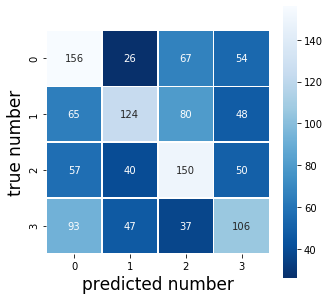

In [69]:
cm1 = metrics.confusion_matrix(testY, Y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm1, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('true number', size=17)
plt.xlabel('predicted number', size=17)
plt.show()

In [ ]:
model.save_weights('dense1214000128acc0.5.h5')

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'blue', label='Training acc')
plt.plot(epochs, val_acc, 'red', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()